# HousePrice: Exploratory Data Analysis

## 1. Introduction

### 1.1. Background

The aim of the project is to build a machine learning model to predict the sale price of homes based on different explanatory variables describing aspects of residential houses. We aim to minimise the difference between the real price, and the estimated price by our model. We will evaluate model performance using the mean squared error (mse) and the root squared of the mean squared error (rmse).

### 1.2. Dataset


----------------------------------------------------------------------------------------------------------------------

## 2. Import library

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab

from scipy import stats
stats.chiqprob = lambda chisq, df: stats.chi2.sf(chisq,df)

# Dataframe manipulation
import numpy as np
import pandas as pd
import math

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# sns.set(style = 'whitegrid',context = 'notebook')

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

# Modelling Helpers:
# from sklearn.preprocessing import Imputer, Normalizer, scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, ShuffleSplit, cross_validate
from sklearn import model_selection
from sklearn.model_selection import train_test_split

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
# Evaluation metrics for Classification
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,ElasticNet,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
# Evaluation metrics for Regression 
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score, roc_auc_score, auc,
                             precision_score, recall_score, roc_curve, precision_recall_curve,
                             precision_recall_fscore_support, f1_score,
                             precision_recall_fscore_support)

# NLP
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import string
import nltk
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from collections import Counter
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.stem import SnowballStemmer
import string
from scipy.spatial.distance import pdist, squareform
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
from sklearn.metrics.pairwise import cosine_similarity


# Configuration
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

print("Setup complete...")

Setup complete...


C:\Users\maint\AppData\Local\Continuum\anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


----------------------------------------------------------------------------------------------------------------------

## 3. Import dataset

In [2]:
# load dataset
df = pd.read_csv('cleaned_ds.csv')

# dimension of the data
print(df.shape)

# visualise the dataset
df.head()

(1460, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
## target
target = ['SalePrice']
print("\nTarget var: ", target)

text_vars = []

mixed_vars = ['address']

## cat vars
cat_vars = [var for var in df.columns if df[var].dtypes == 'O' if var not in target]
print("\n========================================================================")
print("\nCategorical vars: ", cat_vars)
print('There are {} categorical variables'.format(len(cat_vars)))

one_level = [var for var in cat_vars if len(df[var].unique()) == 1 if var not in mixed_vars+text_vars]
print("\nOne level vars: ", one_level)
print('There are {} One level variables'.format(len(one_level)))

low_levels = [var for var in cat_vars if len(df[var].unique()) <= 30 if var not in mixed_vars+text_vars]
print("\nLow cardinality vars: ", low_levels)
print('There are {} Low cardinality variables'.format(len(low_levels)))

high_levels = [var for var in cat_vars if len(df[var].unique()) > 30 if var not in mixed_vars+text_vars]
print("\nHigh cardinality vars: ", high_levels)
print('There are {} High cardinality variables'.format(len(high_levels)))

print("\nMixed type vars: ", mixed_vars)
print('There are {} Mixed type  variables'.format(len(mixed_vars)))

num_vars = [var for var in df.columns if df[var].dtypes != 'O' if var not in target]
print("\n========================================================================")
print("\nNumerical vars: ", num_vars)
print('\nThere are {} Numerical variables'.format(len(num_vars)))

dis_vars = [var for var in num_vars if len(df[var].unique()) < 20]
print("\nDiscrete vars: ", dis_vars)
print('There are {} Discrete variables'.format(len(dis_vars)))

cont_vars = [var for var in num_vars if var not in dis_vars]
print("\nContinous vars: ", cont_vars)
print('There are {} Continous variables'.format(len(cont_vars)))

datetime_vars = [var for var in df.columns if df[var].dtypes == '<M8[ns]']
print("\n========================================================================")
print("\nDateTime vars: ", datetime_vars)
print('There are {} DateTime variables'.format(len(datetime_vars)))

print("\n========================================================================")
print("\nText vars: ", text_vars)
print('There are {} Text variables'.format(len(text_vars)))


Target var:  ['SalePrice']


Categorical vars:  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
There are 43 categorical variables

One level vars:  []
There are 0 One level variables

Low cardinality vars:  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCon

--------------------------------------------------------------------------

## 4. Check missing values

### 4.1. List of variables with missing values

In [6]:
miss_val_df = pd.DataFrame(df.isnull().sum(),columns=['Count'])
miss_val_df['Percentage'] = 100 * df.isnull().sum()/len(df)
miss_val_df.sort_values(['Percentage'],ascending = False)

,ColumnName,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945


=> Our dataset contains a few variables with missing values

### 4.2. Relationship between values being missing and Sale Price

Evaluate the price of the house for those cases where the information is missing, for each variable.

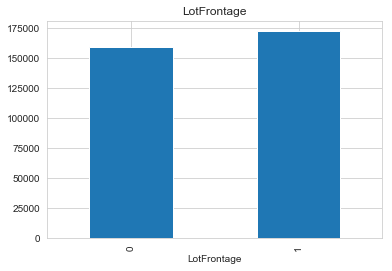

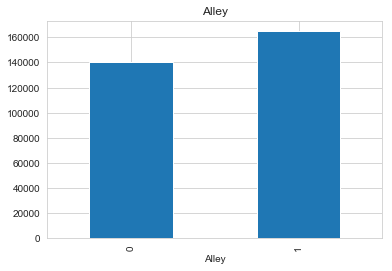

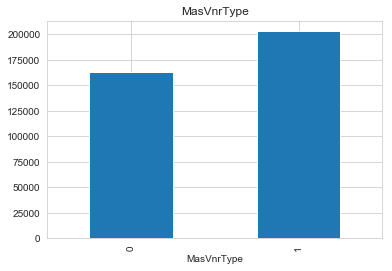

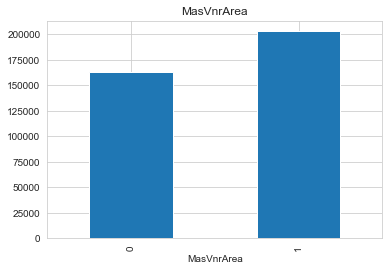

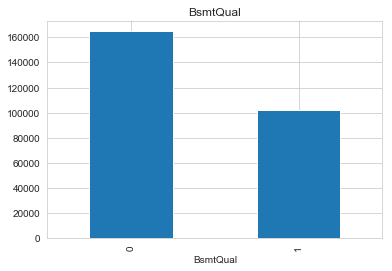

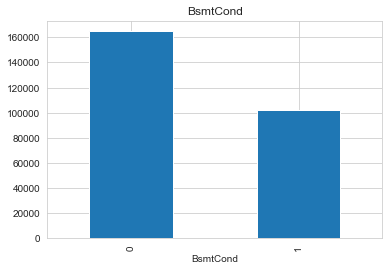

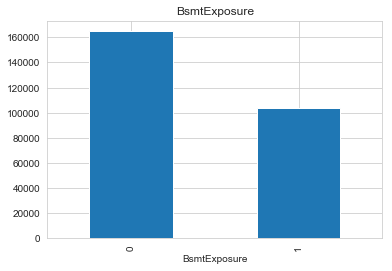

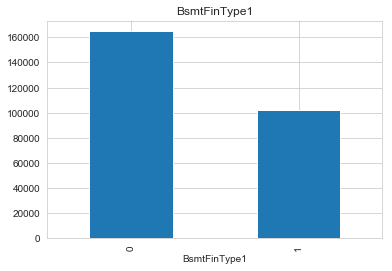

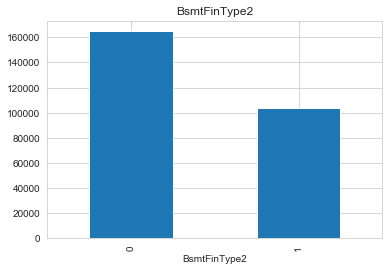

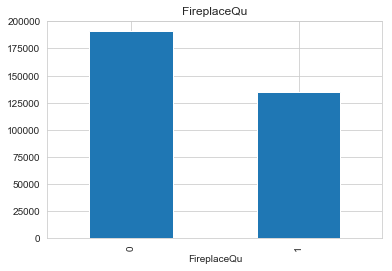

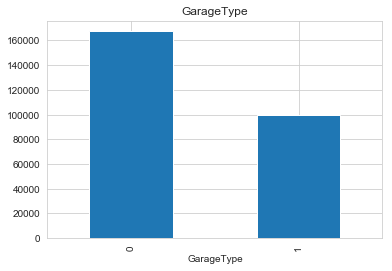

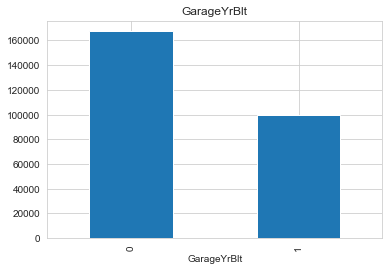

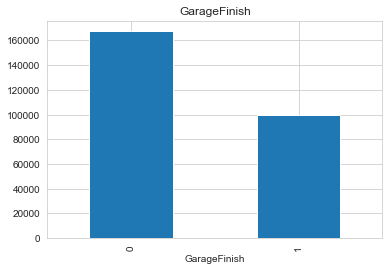

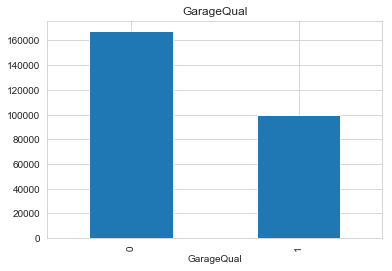

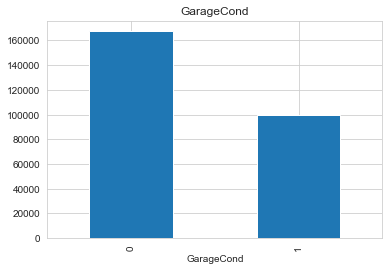

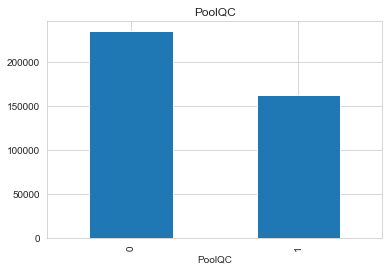

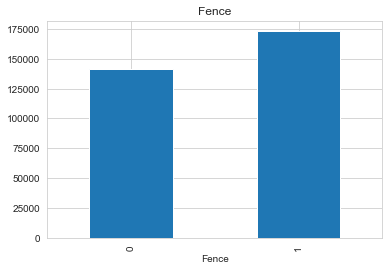

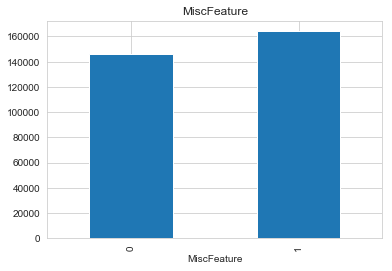

In [9]:
def analyse_na_value(df, var):
    df = df.copy()
    
    # make a variable that indicates 1 if the observation was missing or zero otherwise
    df[var] = np.where(df[var].isnull(), 1, 0)
    
    # calculate the mean SalePrice where the information is missing or present
    df.groupby(var)['SalePrice'].median().plot.bar()
    plt.title(var)
    plt.show()
    
# list of the variables that contain missing values
vars_with_na = [var for var in df.columns if df[var].isnull().sum()>1]
for var in vars_with_na:
    analyse_na_value(df, var)

=> We see that the fact that the information is missing for those variables, is important. We will capture this information when we engineer the variables in the next phase

--------------------------------------------------------------------------

# Target var

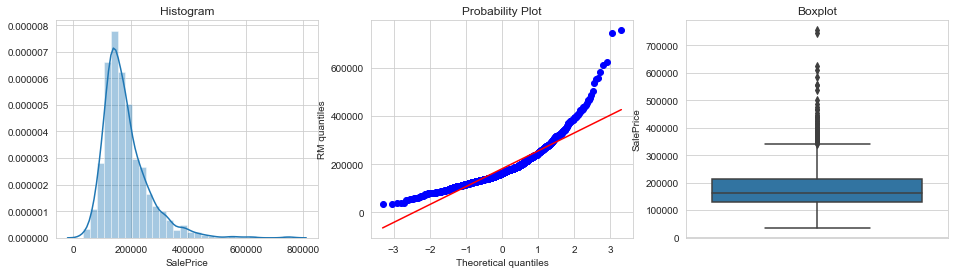

In [19]:
diagnostic_plots(df, 'SalePrice')

## 5. Numerical variables

### 5.1. List of numerical variables

In [10]:
df[num_vars].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008


=> From the above view of the dataset, we notice that:
+ The variable Id is an indicator of the house. This variable is not used for predictions, as there is one different value of the variable per each row
+ There are 4 year variabbles which are temporal data: 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold'

###  5.2. Unnesscessary variables

### 5.3. Temporal variables

From the above view we also notice that we have 4 year variables. 

In [11]:
# list of variables that contain year information
year_vars = [var for var in num_vars if 'Yr' in var or 'Year' in var]
year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

### 5.4. Discrete variables

List of discrete variables i.e., show a finite number of values

In [13]:
df[dis_vars].head()

,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold,YrSold
0,60,7,5,1,0,2,1,3,1,8,0,2,0,2,2008
1,20,6,8,0,1,2,0,3,1,6,1,2,0,5,2007
2,60,7,5,1,0,2,1,3,1,6,1,2,0,9,2008
3,70,7,5,1,0,1,0,3,1,7,1,3,0,2,2006
4,60,8,5,1,0,2,1,4,1,9,1,3,0,12,2008


=> We can see that these variables tend to be Qualifications or grading scales, or refer to the number of rooms, or units => Analyse their contribution to the house price.

#### Analyze distribution of these variables

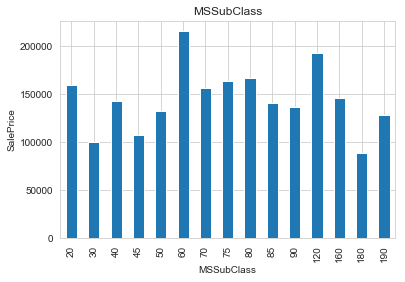

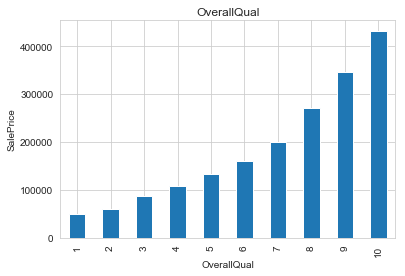

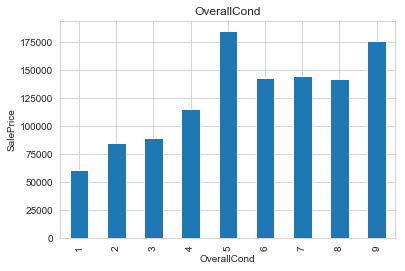

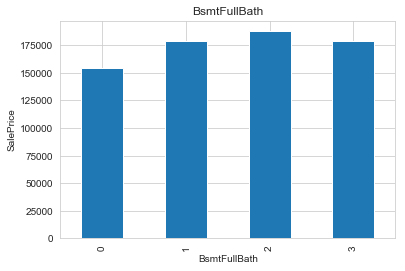

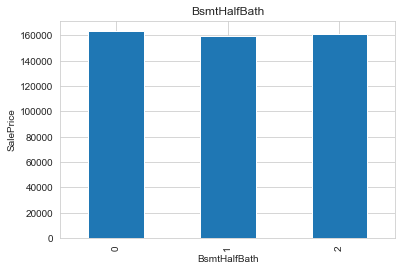

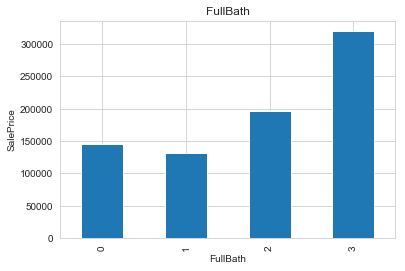

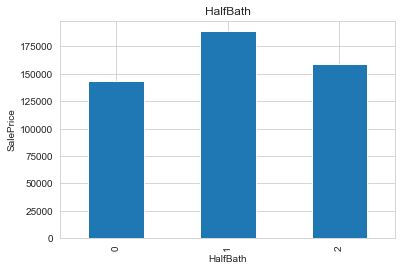

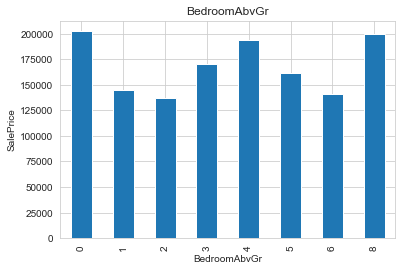

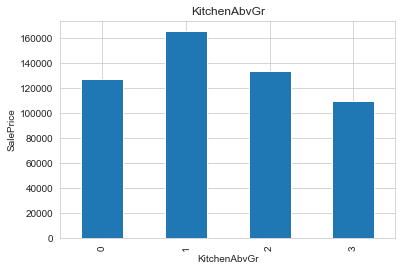

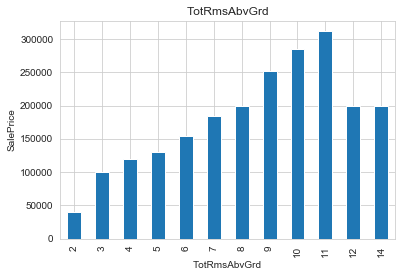

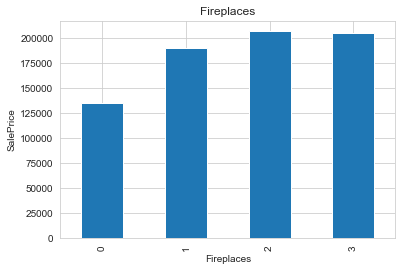

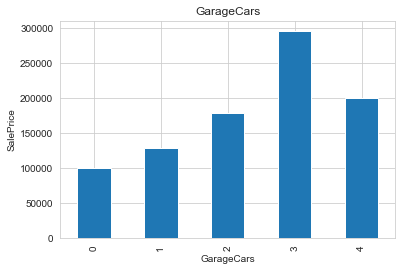

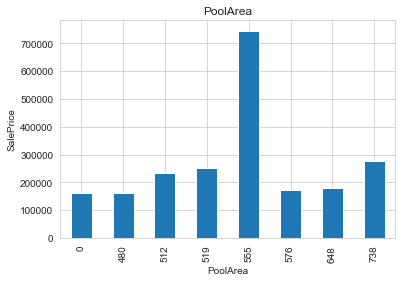

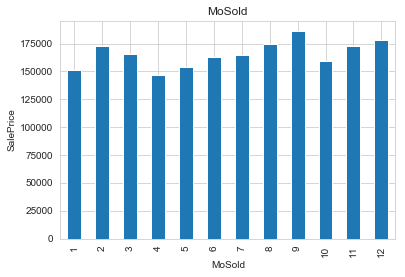

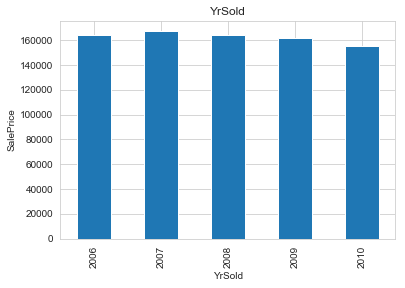

In [14]:
def analyse_discrete(df, var):
    df = df.copy()
    df.groupby(var)['SalePrice'].median().plot.bar()
    plt.title(var)
    plt.ylabel('SalePrice')
    plt.show()
    
for var in dis_vars:
    analyse_discrete(df, var)

We see that there is a relationship between the variable numbers and the SalePrice, but this relationship is not always monotonic. For example, for OverallQual, there is a monotonic relationship: the higher the quality, the higher the SalePrice. However, for OverallCond, the relationship is not monotonic. Clearly, some Condition grades, like 5, favour better selling prices, but higher values do not necessarily do so. We need to be careful on how we engineer these variables to extract the most for a linear model. 

### 5.5. Continuous variables

Let's go ahead and find the distribution of the continuous variables. We will consider continuous all those that are not temporal or discrete variables in our dataset.

In [15]:
# list of continuous variables
df[cont_vars].head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,0,1710,2003.0,548,0,61,0,0,0,0
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,1976.0,460,298,0,0,0,0,0
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,0,1786,2001.0,608,0,42,0,0,0,0
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,756,0,1717,1998.0,642,0,35,272,0,0,0
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,2000.0,836,192,84,0,0,0,0


#### Analyze distribution of these variables

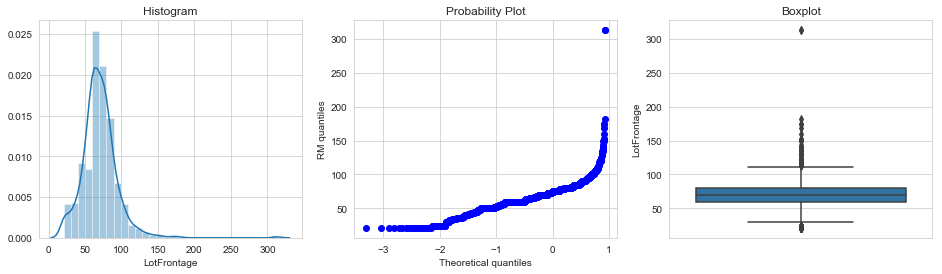

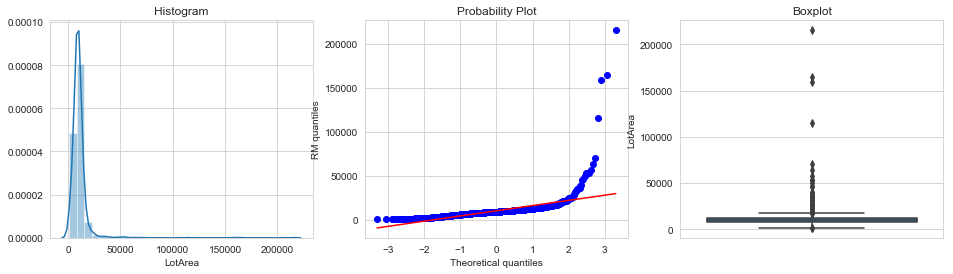

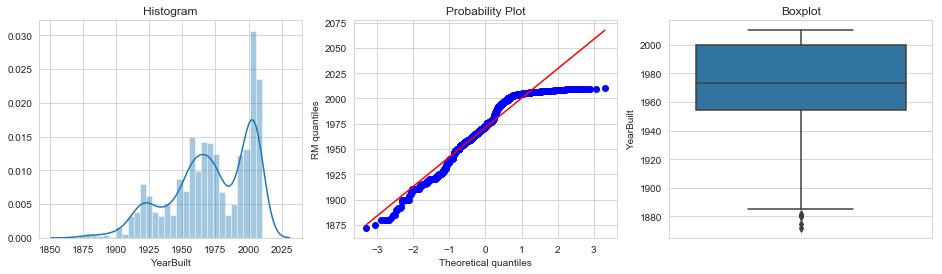

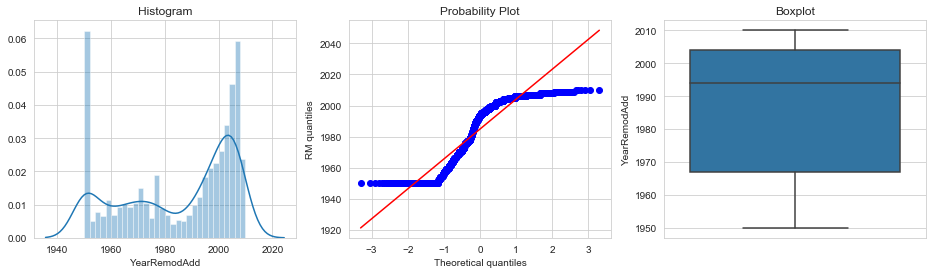

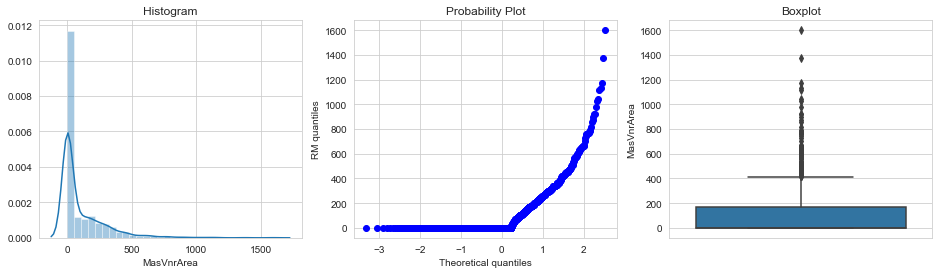

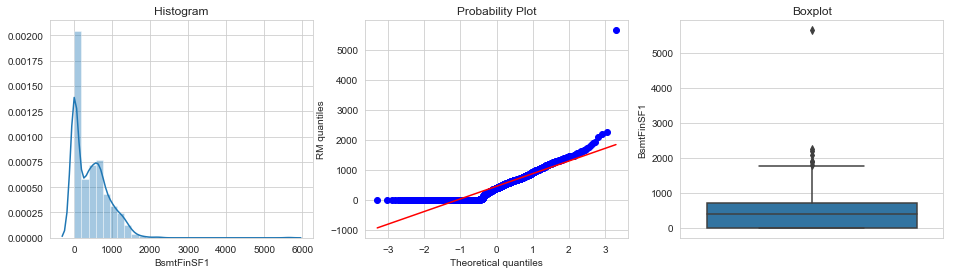

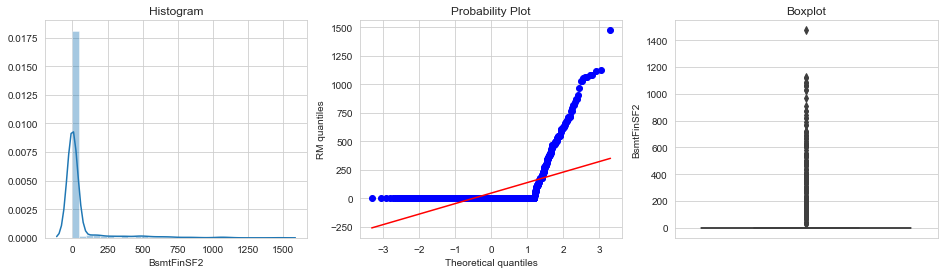

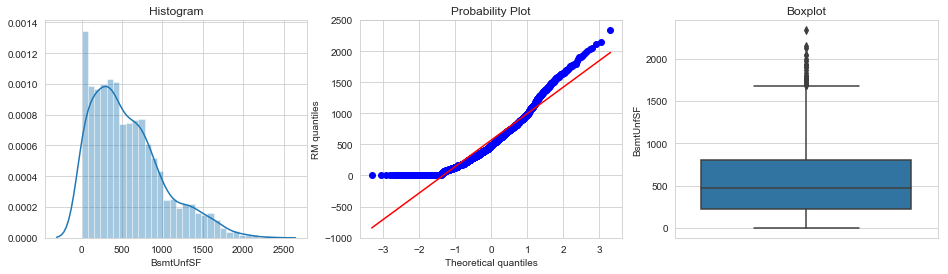

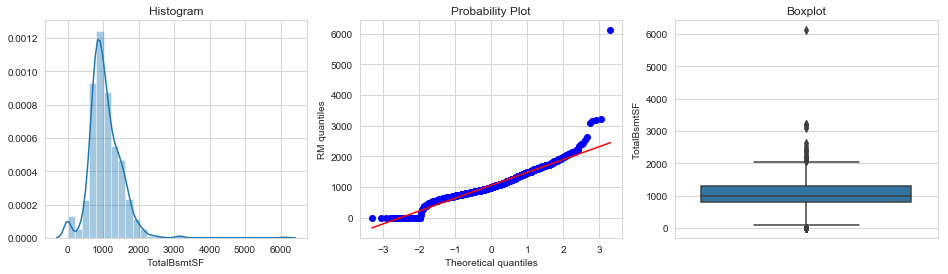

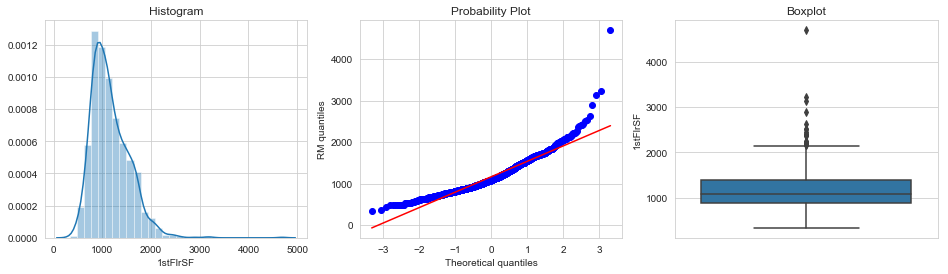

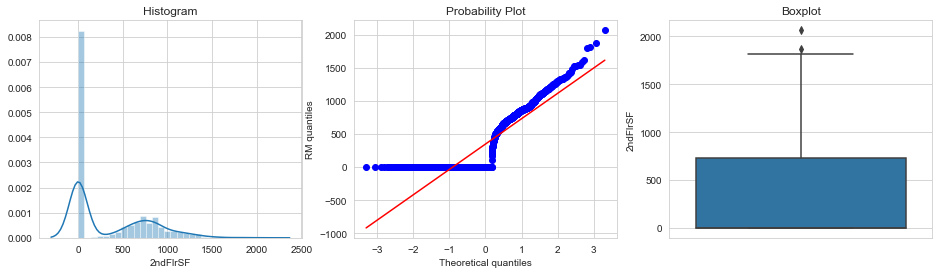

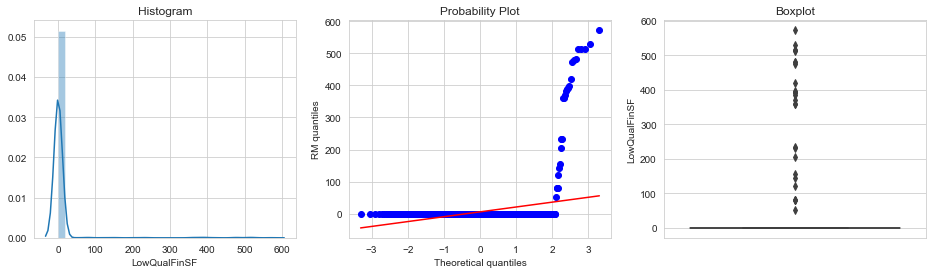

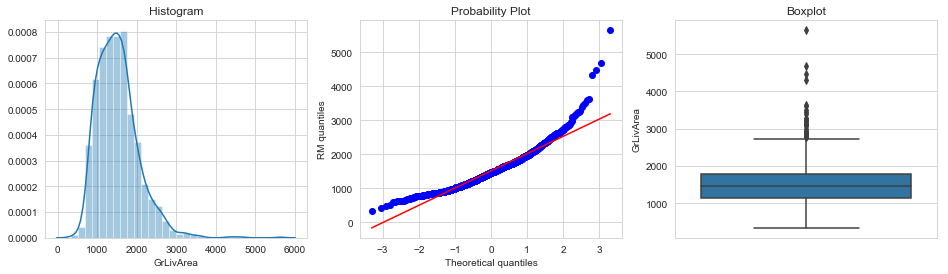

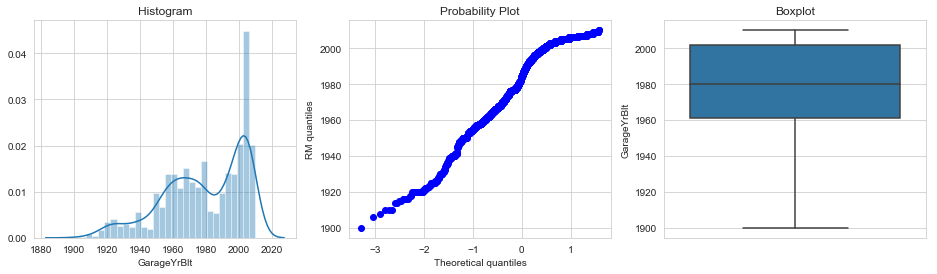

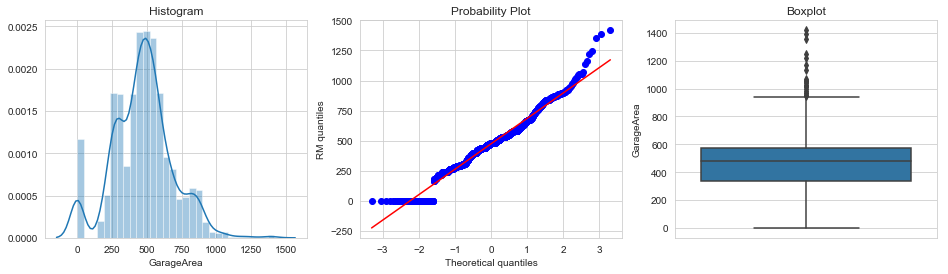

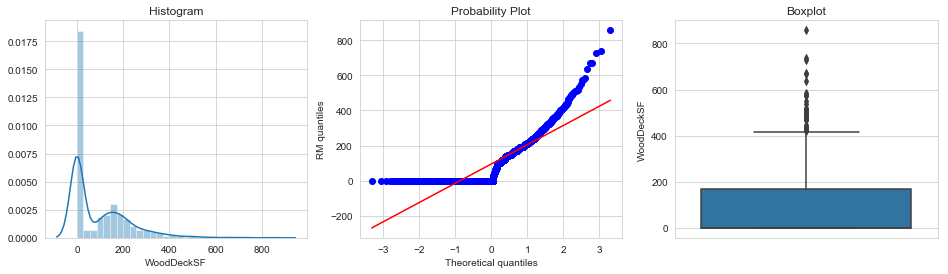

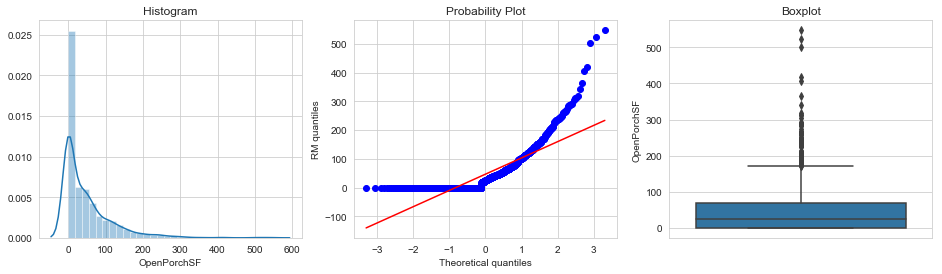

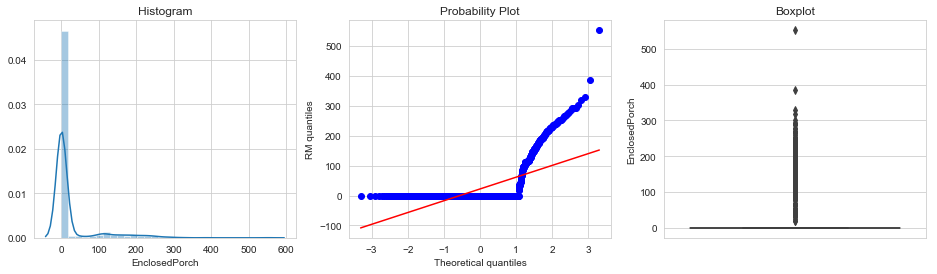

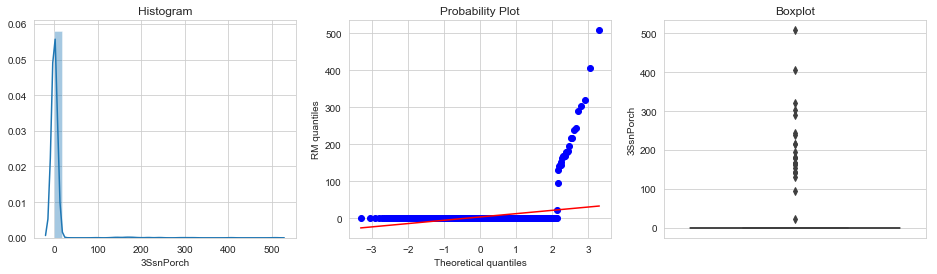

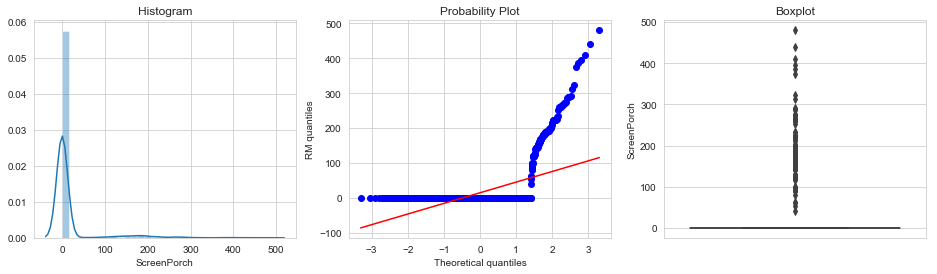

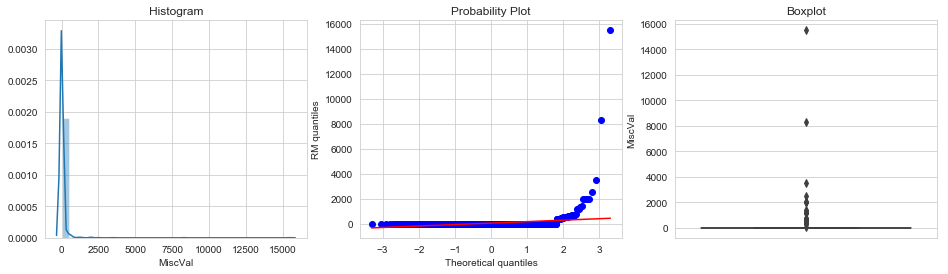

In [17]:
# function to create histogram, Q-Q plot and
# boxplot


def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=pylab)
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()
    
for var in cont_vars:
    diagnostic_plots(df, var)

We see that all of the above variables, are not normally distributed, including the target variable 'SalePrice'. For linear models to perform best, we need to account for non-Gaussian distributions. We will transform our variables our feature engineering section.

#### Log transformation
Evaluate here if a log transformation renders the variables more Gaussian looking:

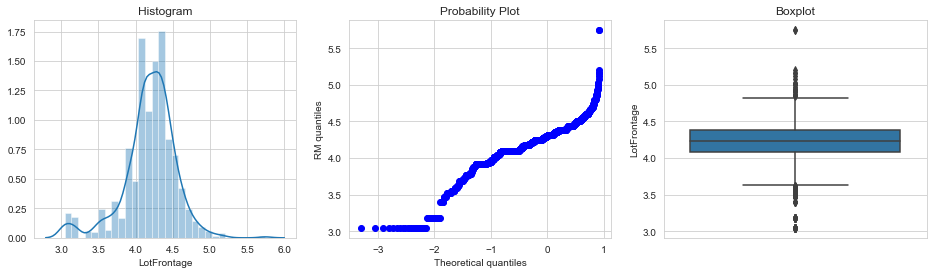

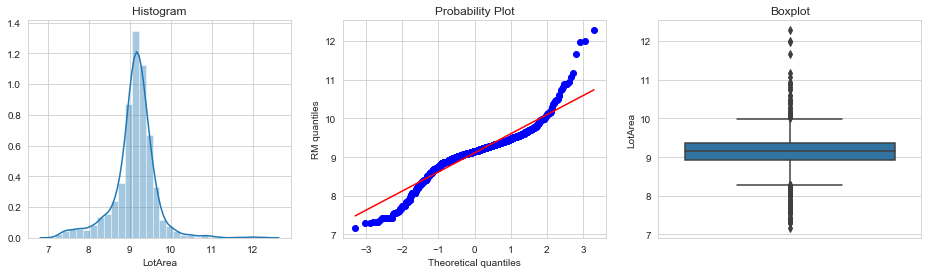

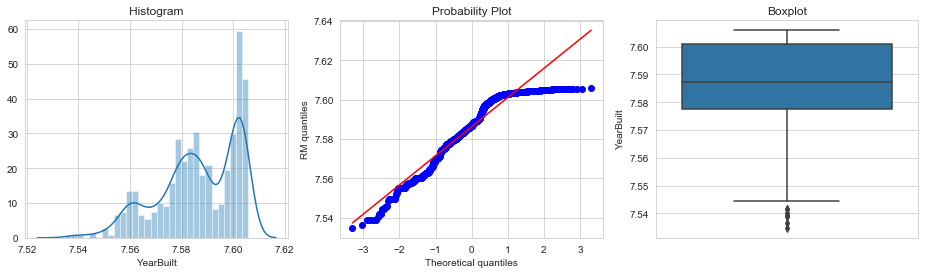

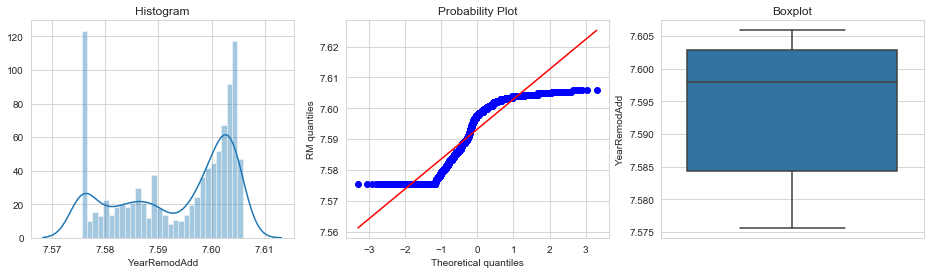

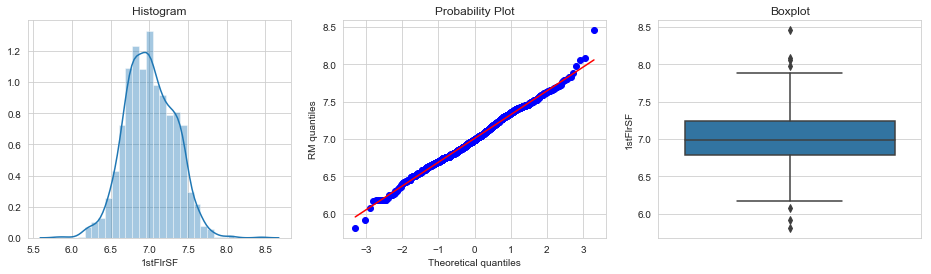

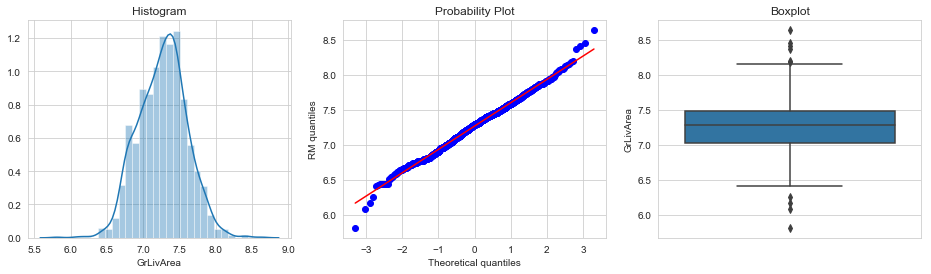

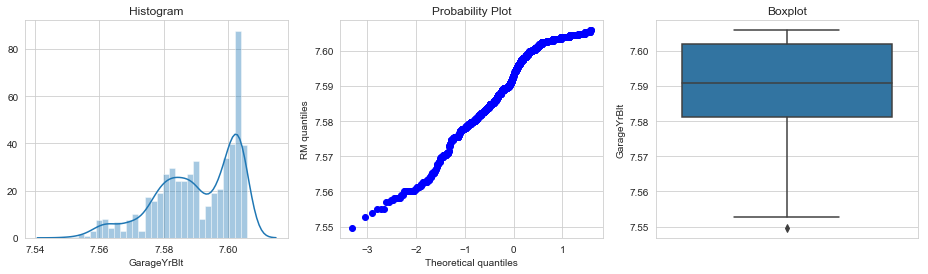

In [24]:
def analyse_transformed_continous(df, var):
    df = df.copy()
    
    # log does not take negative values, so let's be careful and skip those variables
    if 0 in df[var].unique():
        pass
    else:
        # log transform the variable
        df[var] = np.log(df[var])
        diagnostic_plots(df, var)
    
for var in cont_vars:
    analyse_transformed_continous(df, var)

We get a better spread of values for most variables when we use the logarithmic transformation. This engineering step will most likely add performance value to our final model.

#### Relationship between log transformed house price and other variables
Explore the relationship between the house price and the transformed variables with more detail

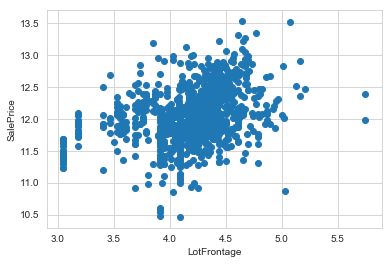

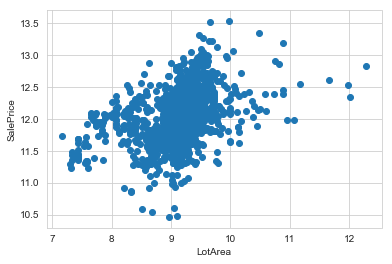

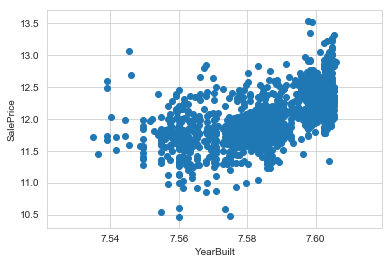

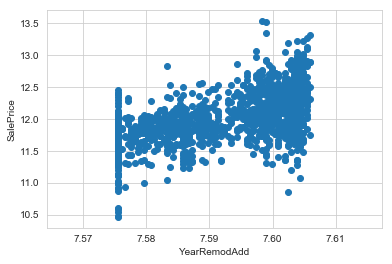

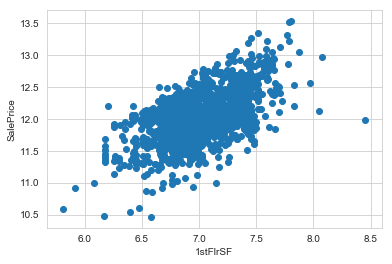

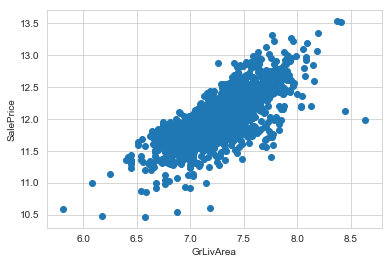

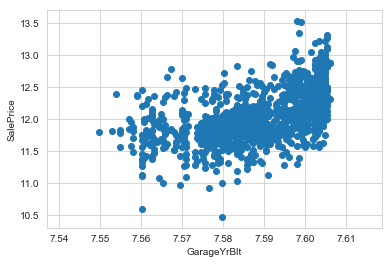

In [26]:
def transform_analyse_continous(df, var):
    df = df.copy()
    
    # log does not take negative values, so let's be careful and skip those variables
    if 0 in df[var].unique():
        pass
    else:
        # log transform
        df[var] = np.log(df[var])
        df['SalePrice'] = np.log(df['SalePrice'])
        plt.scatter(df[var], df['SalePrice'])
        plt.ylabel('SalePrice')
        plt.xlabel(var)
        plt.show()
    
for var in cont_vars:
    if var !='SalePrice':
        transform_analyse_continous(df, var)

From the previous plots, we observe some monotonic associations between SalePrice and the variables to which we applied the log transformation, for example 'GrLivArea'.

----------------------------------------------------------------------------------------------------------------------

## 6. Categorical variables

### 6.4. Relationship between categorical variables and target variable

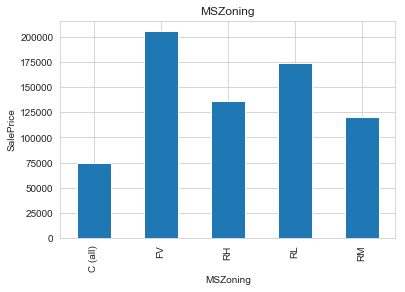

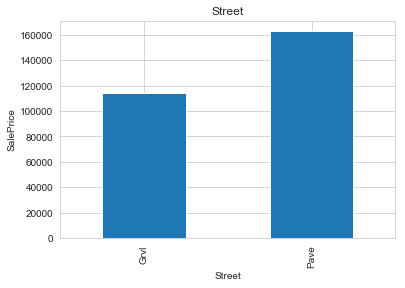

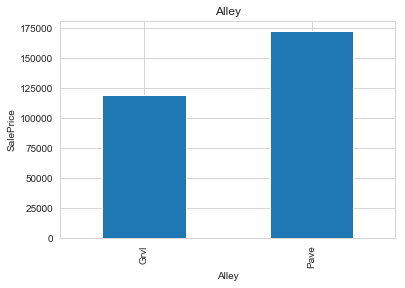

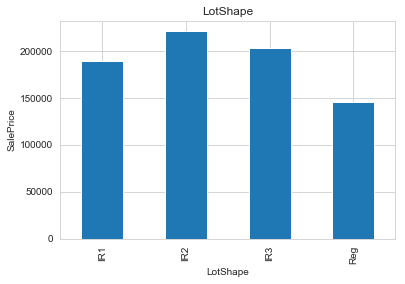

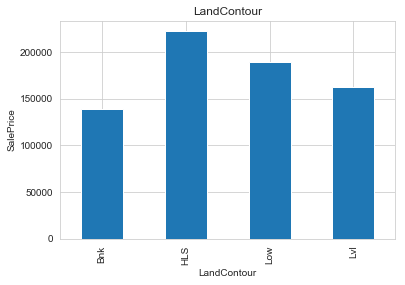

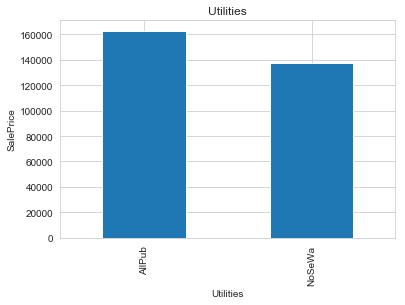

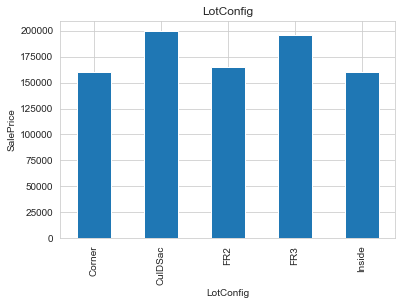

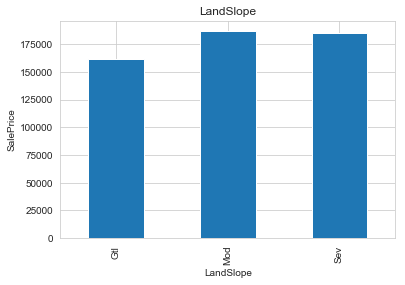

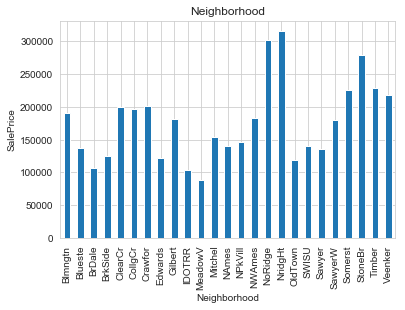

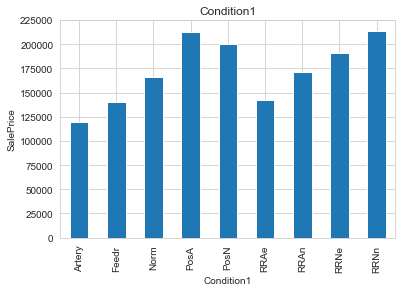

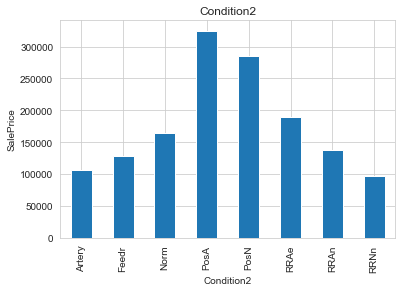

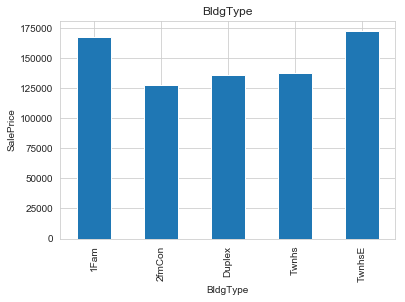

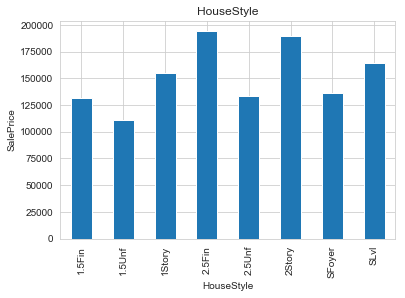

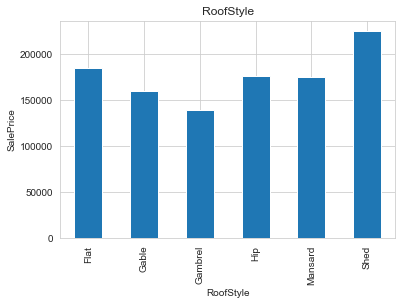

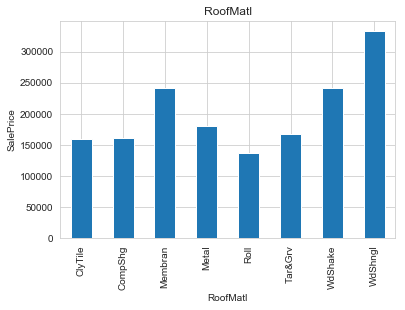

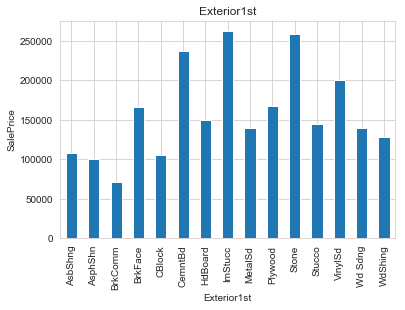

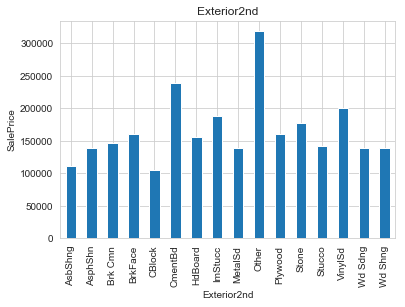

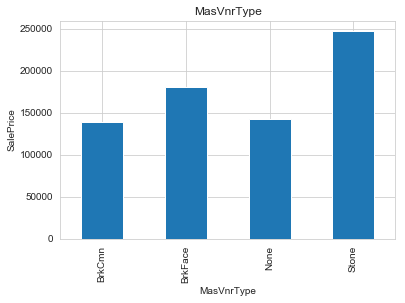

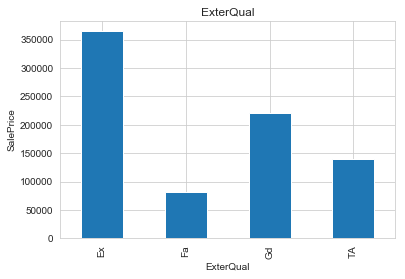

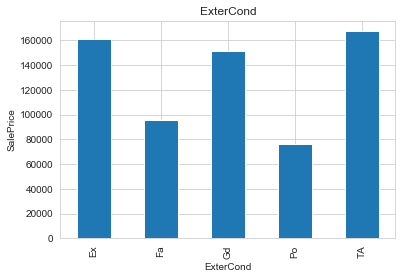

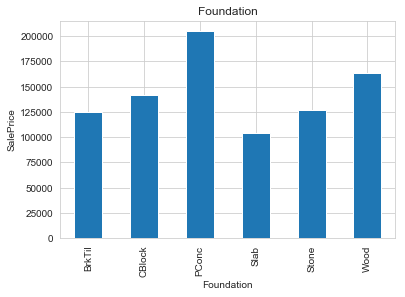

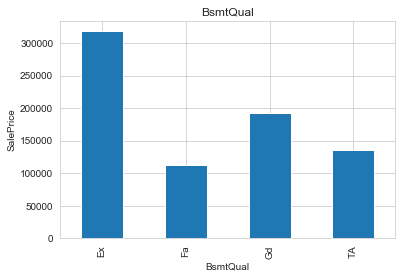

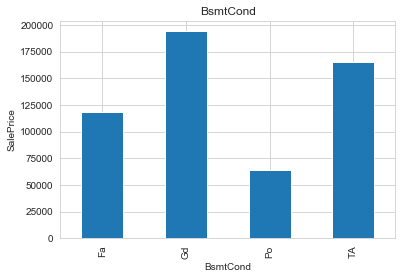

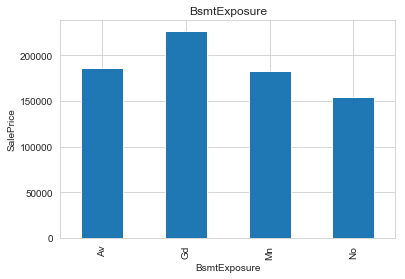

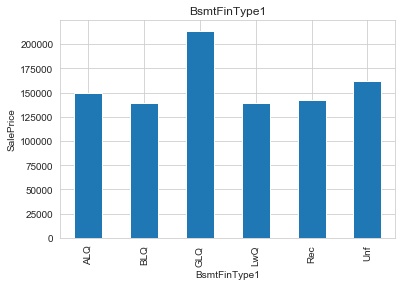

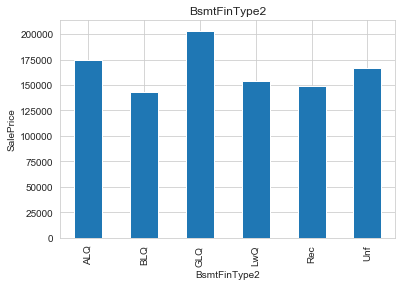

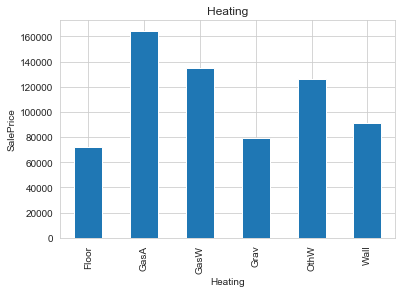

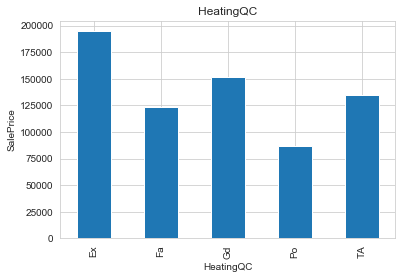

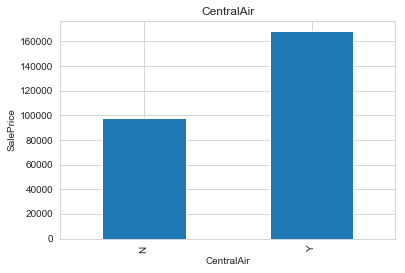

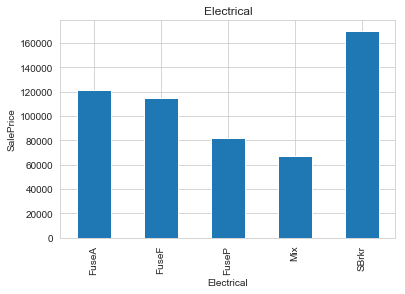

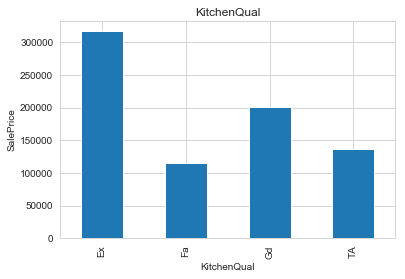

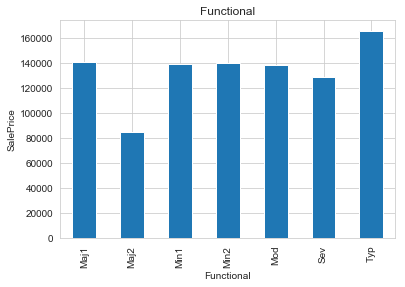

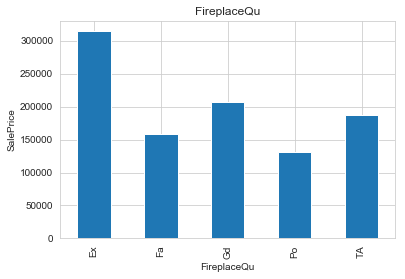

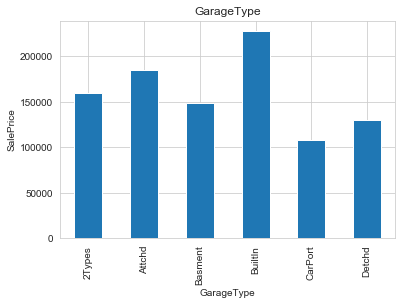

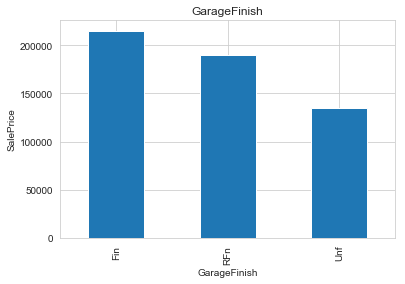

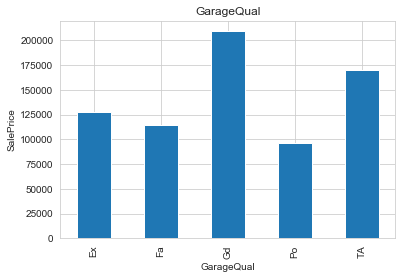

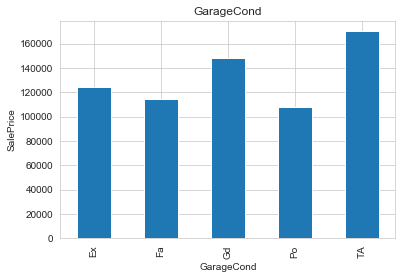

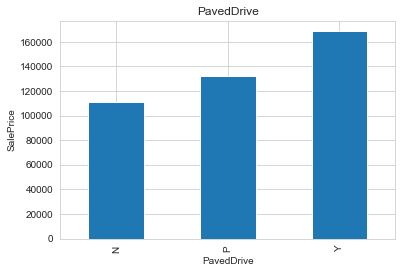

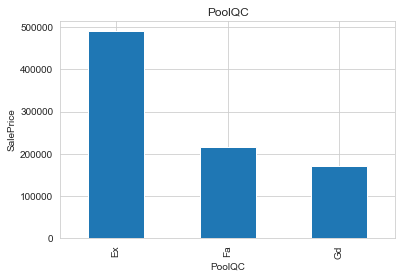

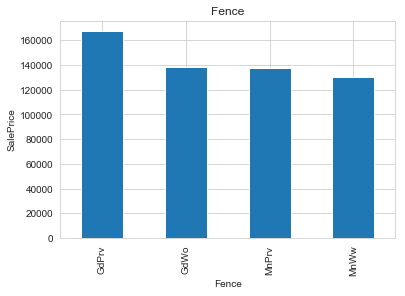

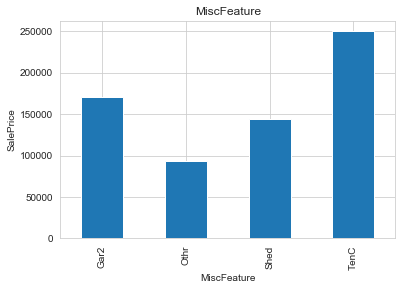

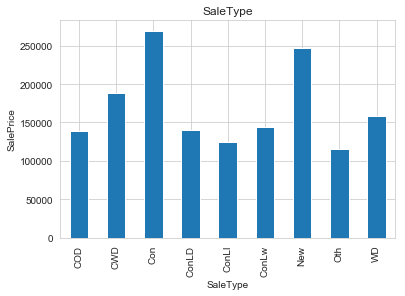

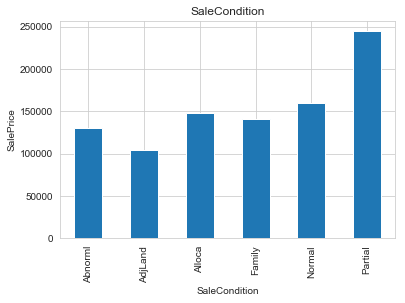

In [27]:
for var in cat_vars:
    analyse_discrete(df, var)

Clearly, the categories give information on the SalePrice.We will transform these strings / labels into numbers, so that we capture this information and transform it into a monotonic relationship between the category and the house price.

----------------------------------------------------------------------------------------------------------------------

## 7. Temporal variables

Typically, we will not use date variables as is, rather we extract information from them. For example, the difference in years between the year the house was built and the year the house was sold. We need to take this into consideration when we will engineer our features.

In [28]:
# list of variables that contain year information
year_vars = [var for var in num_vars if 'Yr' in var or 'Year' in var]
year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [30]:
# let's explore the content of these year variables
for var in year_vars:
    print(var, df[var].unique())
    print()

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]

YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]

GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 200

We can also explore the evolution of the sale price with the years in which the house was sold:

Text(0.5,1,'Change in House price with the years')

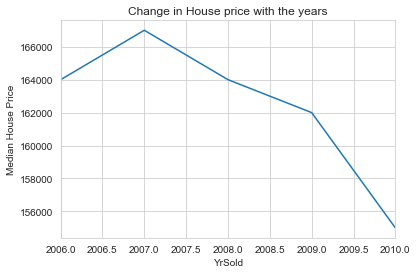

In [31]:
df.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel('Median House Price')
plt.title('Change in House price with the years')

There has been a drop in the value of the houses. That is unusual, in real life, house prices typically go up as years go by.


Let's go ahead and explore whether there is a relationship between the year variables and SalePrice. For this, we will capture the elapsed years between the Year variables and the year in which the house was sold:

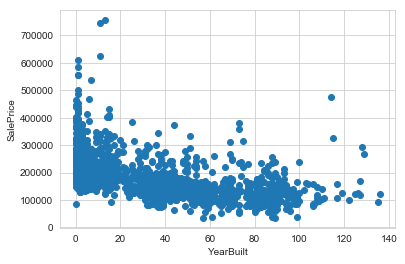

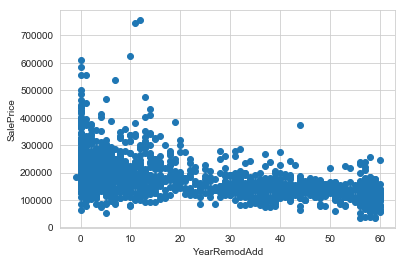

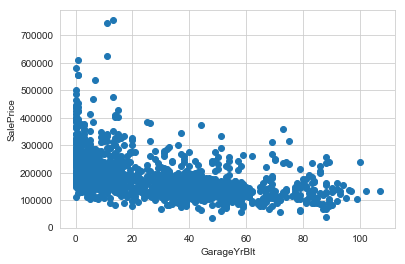

In [32]:
# let's explore the relationship between the year variables and the house price in a bit of more details
def analyse_year_vars(df, var):
    df = df.copy()
    
    # capture difference between year variable and year the house was sold
    df[var] = df['YrSold'] - df[var]
    
    plt.scatter(df[var], df['SalePrice'])
    plt.ylabel('SalePrice')
    plt.xlabel(var)
    plt.show()
    
for var in year_vars:
    if var !='YrSold':
        analyse_year_vars(df, var)
    

We see that there is a tendency to a decrease in price, with older features.